In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
data = pd.read_csv('IRIS.csv')

# Prepare features and labels
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target labels (last column)

# Encode labels (from string labels to numeric values)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with Polynomial kernel 
svm_model = SVC(kernel='poly', degree=3, C=1.0, random_state=42)  # Polynomial kernel SVM
svm_model.fit(X_train, y_train)  

# Predictions on both train and test data
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Evaluate accuracy on both train and test data
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy on Train Data: {accuracy_train:.2f}")
print(f"Accuracy on Test Data: {accuracy_test:.2f}")

# Classification Report for Test Data
class_report = classification_report(y_test, y_pred_test)
print("\nClassification Report (Test Data):")
print(class_report)


Accuracy on Train Data: 0.98
Accuracy on Test Data: 0.98

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



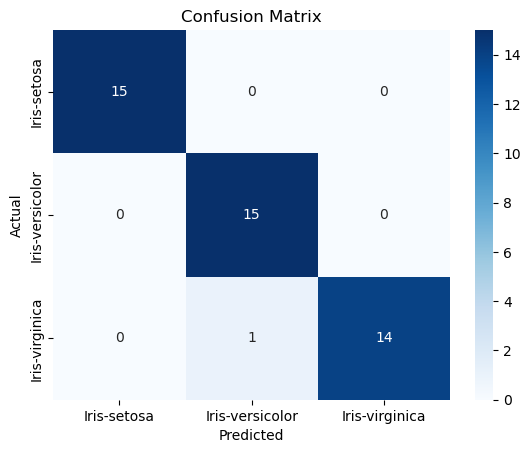

In [8]:
# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Visualize confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()